# House price competition
## Introduction
We will build a model to forecast the house price given some feature we will identify during the preliminary analysis. The model chosen will be a linear regression and a ANN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

The dataset present several categorical variable, so we can expect to one hot encode such feature later on. Now we deal with missing data, all the feature with more than 40% of nan could be potentiall dropped after some deepr analysis.

nan ratio in Alley 0.9376712328767123
nan ratio in FireplaceQu 0.4726027397260274
nan ratio in PoolQC 0.9952054794520548
nan ratio in Fence 0.8075342465753425
nan ratio in MiscFeature 0.963013698630137


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical,Id,Functional,Fireplaces,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,GarageCars,GrLivArea,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFullBath,HeatingQC,LowQualFinSF,LandSlope,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LotConfig,YearBuilt,Utilities,LandContour,LotShape,Street,LotArea,MSZoning,OverallCond,YearRemodAdd,2ndFlrSF,BsmtFinSF2,1stFlrSF,CentralAir,MSSubClass,Heating,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,0.995205,0.963014,0.937671,0.807534,0.472603,0.177397,0.055479,0.055479,0.055479,0.055479,0.055479,0.026027,0.026027,0.025342,0.025342,0.025342,0.005479,0.005479,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


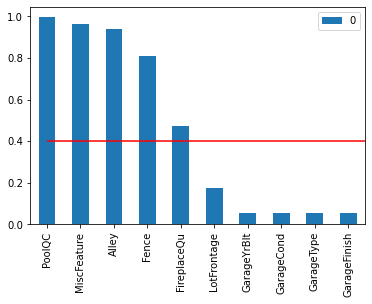

In [3]:
def isNull(cols,thr):   
    to_drop = []
    err = pd.DataFrame(columns=cols,index=[0])
    for i in cols:
        nar = sum(df[i].isna())/len(df[i])
        if nar>thr:
            print(f"nan ratio in {i}",nar)
            to_drop.append(i)
        err[i]=nar
        
    return err,to_drop


err, to_fill = isNull(df.columns,.4)

display(err.sort_values(0, axis=1, ascending=False, inplace=False, kind='quicksort', na_position='last'))
err = err.sort_values(0, axis=1, ascending=False, inplace=False, kind='quicksort', na_position='last')
err.iloc[:,:10].T.plot.bar()

plt.hlines(y=.4,xmin=0,xmax=len(err[err>0].dropna(axis=1).columns),color='r')
plt.show()




So now lets observe these columns one by one. The columns with a small percentage of nan will be filled later.

Alley 
 count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object


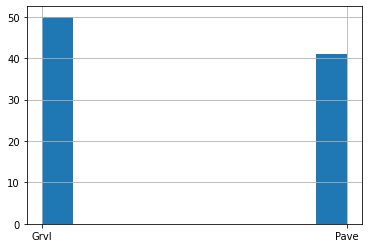

FireplaceQu 
 count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object


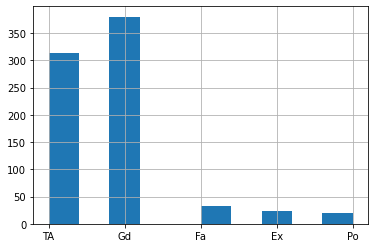

PoolQC 
 count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object


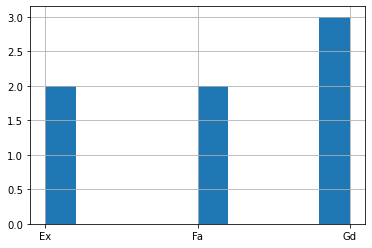

Fence 
 count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object


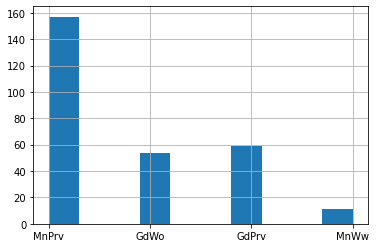

MiscFeature 
 count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object


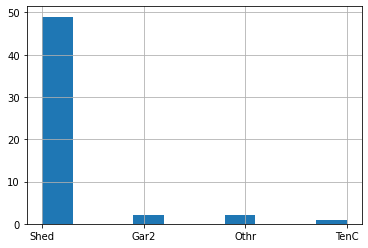

In [4]:
for i in to_fill:
    print(i,"\n",df[i].describe())
    df[i].hist()
    plt.show()

Based on the data description:
1. Alley: NA refer to the absence of alley access
2. FireplaceQu: NA refer to absence of fireplace
3. PoolQC: refer to the absence of a pool.
4. Fence: NA absence of fence
5. MiscFeature: NA refer to absence of miscellaneous feature.
<br>

Given this condition we will fill the nan value of these feature with "None".

In [5]:
for i in to_fill:
    df[i] = df[i].fillna("None")

The other columns presenting missing data will be completed by substituing nan with the mean for float columns and mode for the int columns. Also for the categorical variable we will apply the mode as a fill value.

In [6]:
def fill_absent(df):
    for col in df.columns[:-1]:
        if df[col].dtype in ['float64', 'int64']:
            if df[col].dtype == 'float64':
                df[col].fillna(df[col].mean(), inplace=True)
            elif df[col].dtype == 'int64':
                df[col].fillna(df[col].mode(), inplace=True)
        else:
            df[col] = df[col].astype(str)
            '''df[col]= df[col].replace('None',np.nan)
            df[col]= df[col].replace('Null',np.nan)
            df[col]= df[col].replace('nan',np.nan)'''
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df

In [7]:
df = fill_absent(df)
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

Now we will do some exploratory analysis before building ther pipeline for the model. More in detail we will first analyse correlation among the feature.

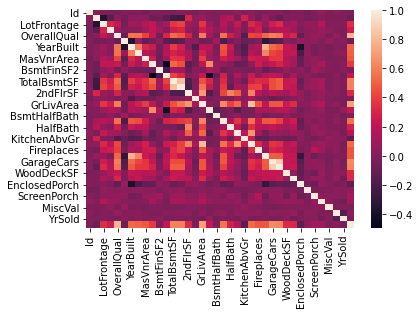

In [8]:
cor = df.corr()
sns.heatmap(cor)
plt.show()

We will drop the columns with correlation higher than 50%

['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']


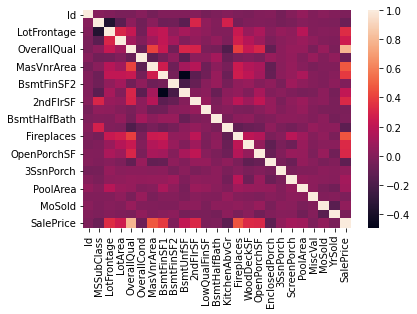

In [9]:
def drop_corr(x=0.8):
    cor = df.corr()
    upper_tri =cor.where(np.triu(np.ones(cor.shape),k=1).astype(bool))
    drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > x)]
    if "SalePrice" in drop:
        drop.remove("SalePrice")
    print(drop)
    for i in drop:
        to_drop.append(i)
    new_df = df.drop(drop,axis=1)
    return new_df
to_drop = [] 
n_df = drop_corr(.5)
sns.heatmap(n_df.corr())
plt.show()

Finally we can explore how each feature is distributed and its correlation with the label we are trying to predict.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,6,8,15,16,5,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,6,5,2,6,NaN,NaN,NaN,NaN,4,7,NaN,6,7,4,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,TA,Typ,NaN,None,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,735,1360,NaN,690,870,605,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,1453,1179,1406,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,NaN,NaN,NaN,NaN,346.992466,5.844521,0.057534,1.046575,NaN,NaN,0.613014,NaN,NaN,NaN,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,NaN,NaN,NaN,NaN,NaN,180.569112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,NaN,NaN,NaN,NaN,436.528436,48.623081,0.238753,0.220338,NaN,NaN,0.644666,NaN,NaN,NaN,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,223.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.500000,NaN,0.000000,477.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,N

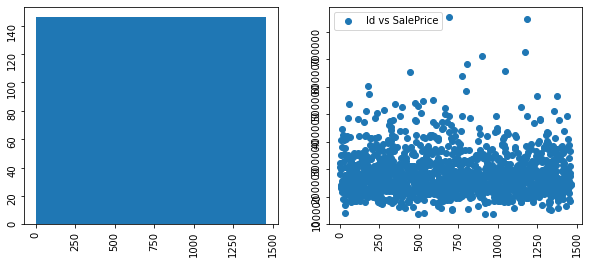

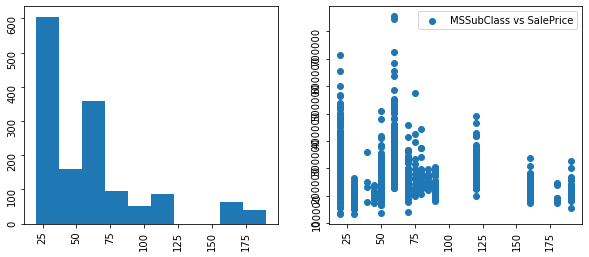

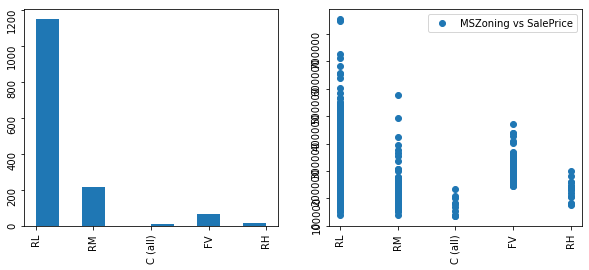

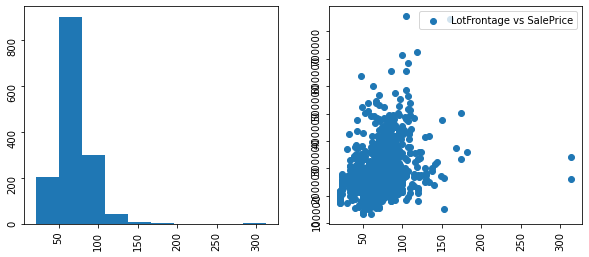

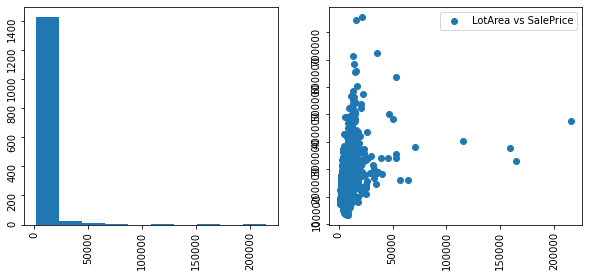

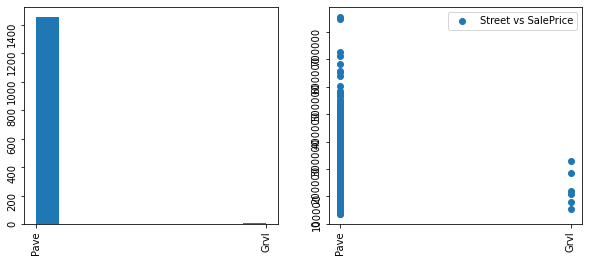

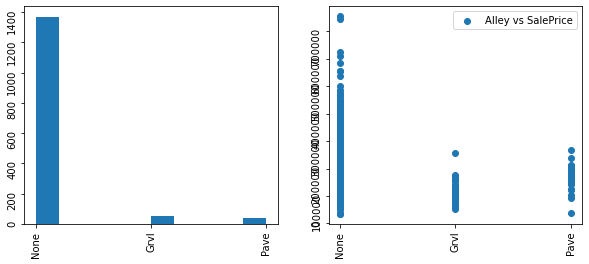

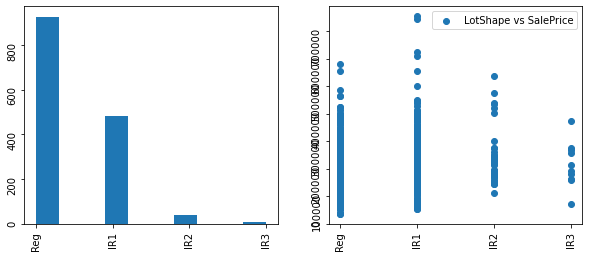

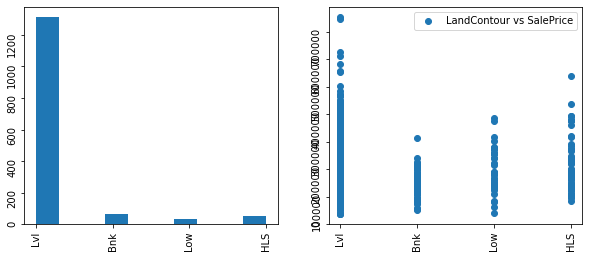

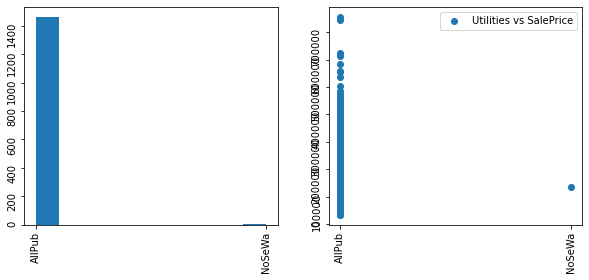

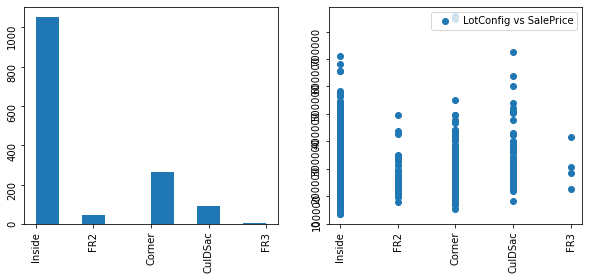

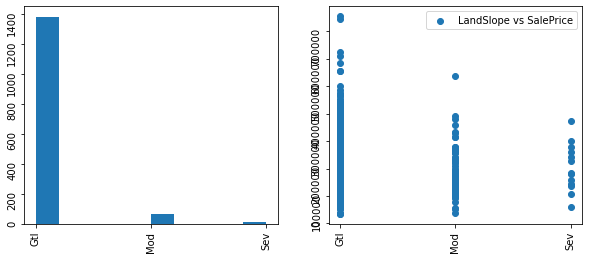

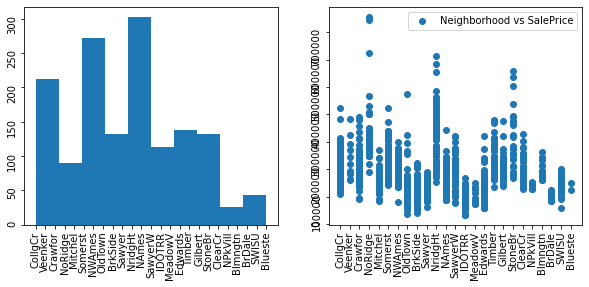

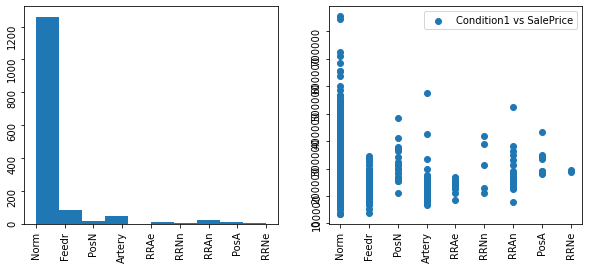

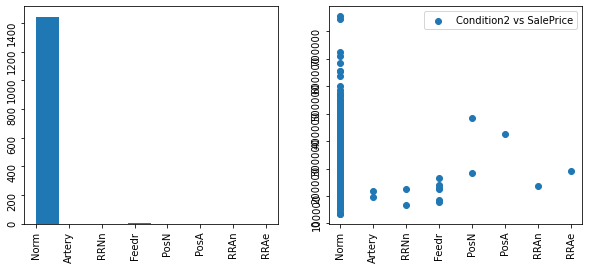

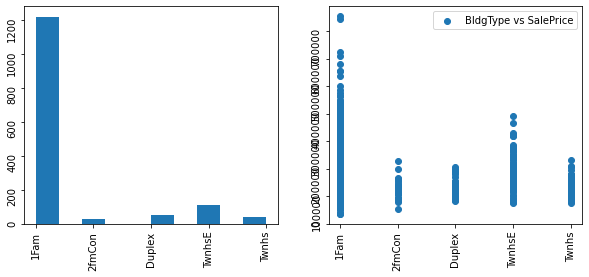

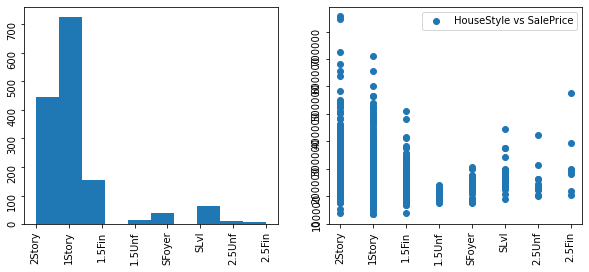

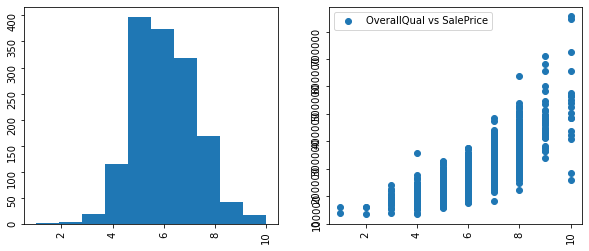

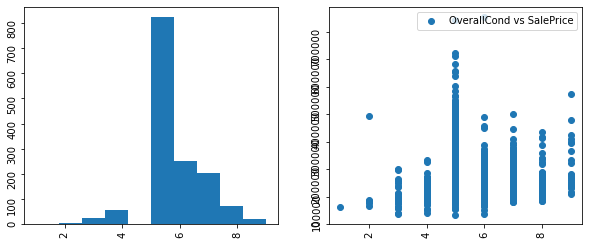

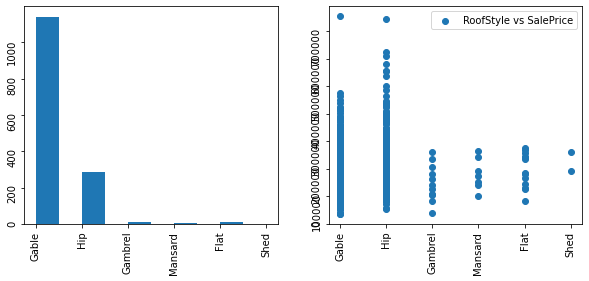

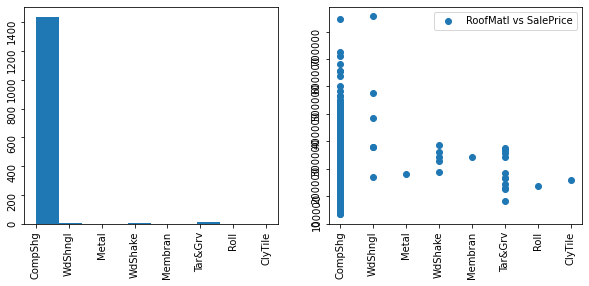

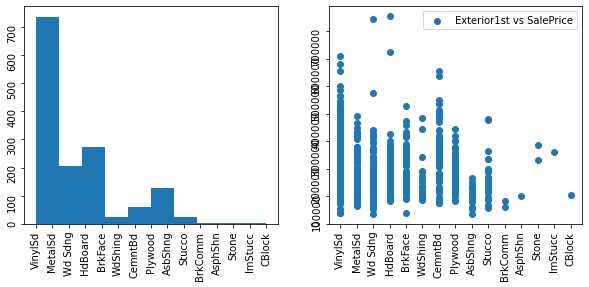

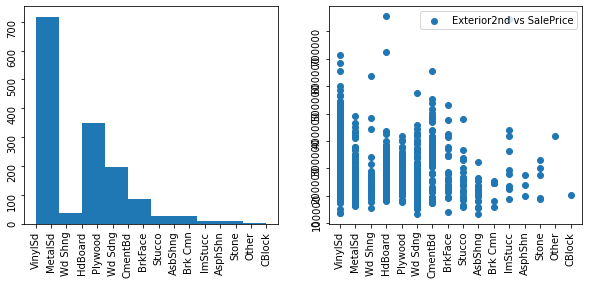

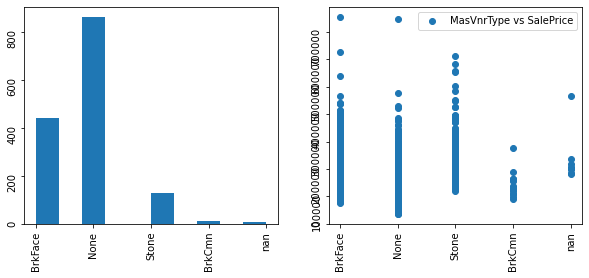

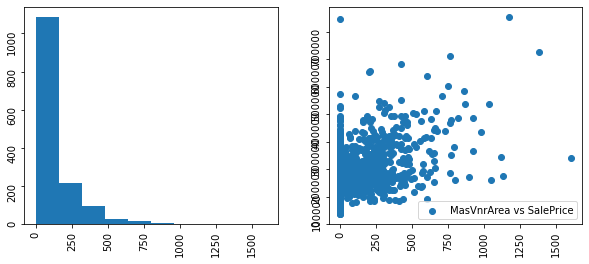

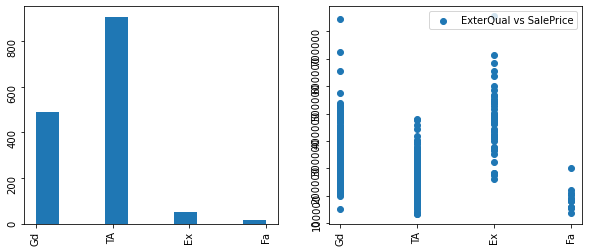

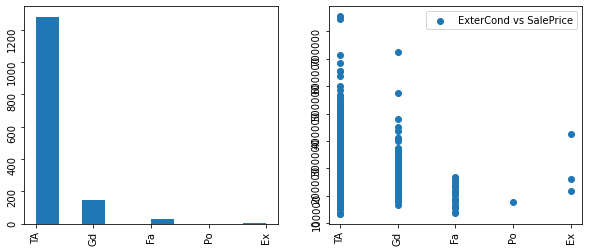

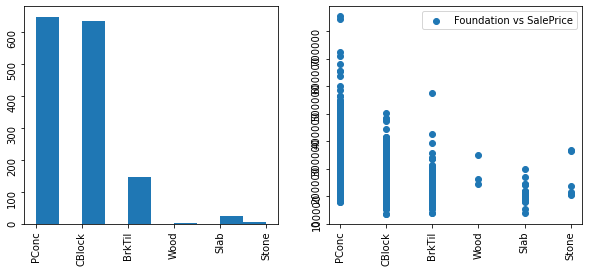

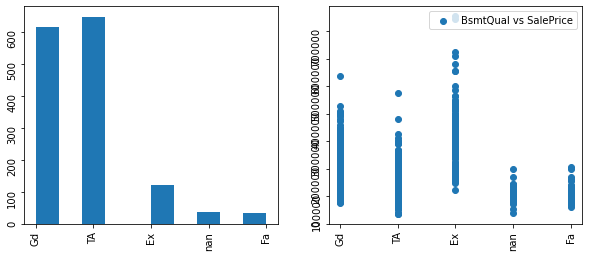

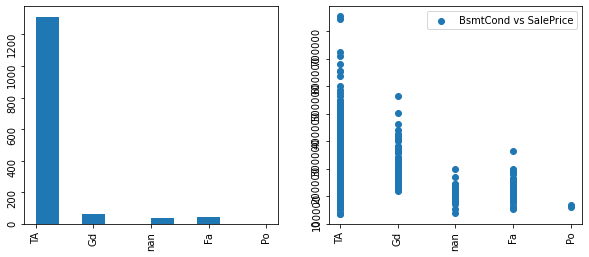

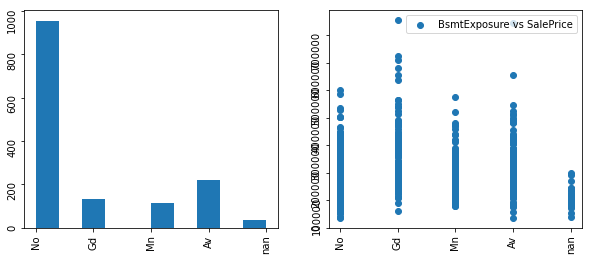

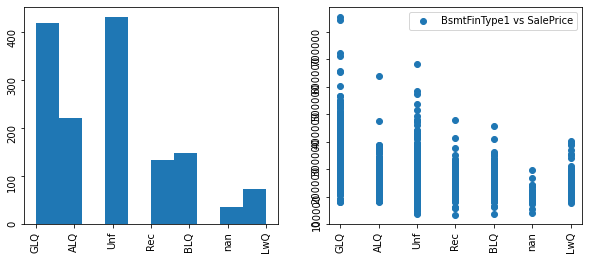

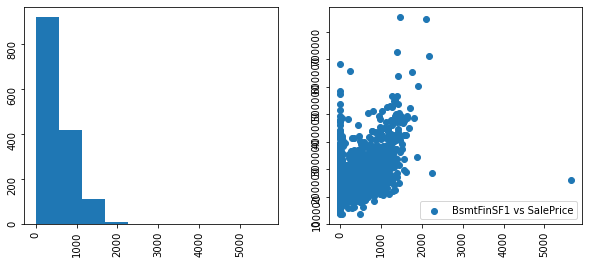

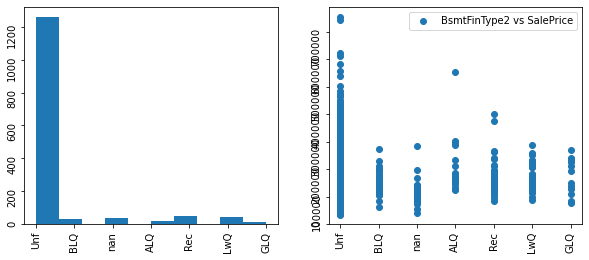

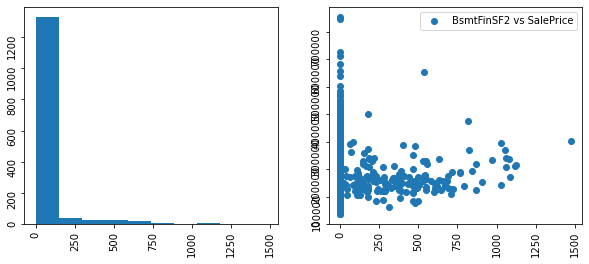

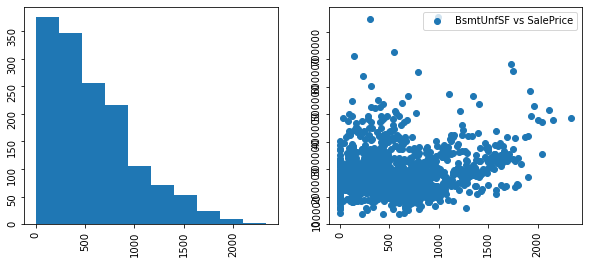

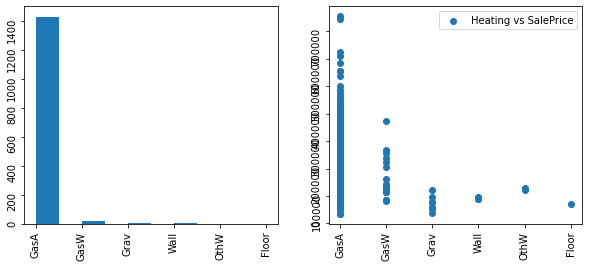

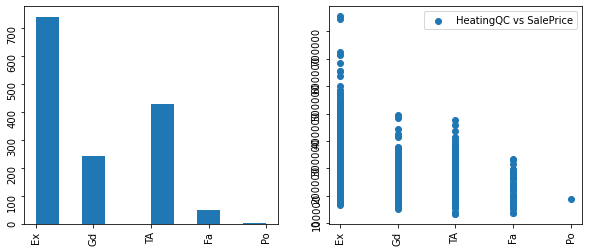

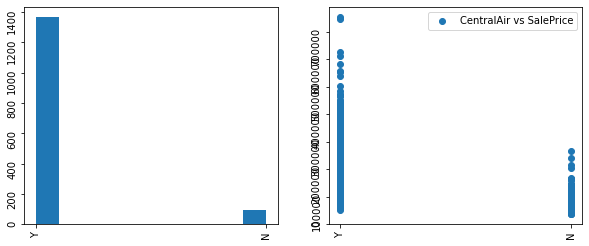

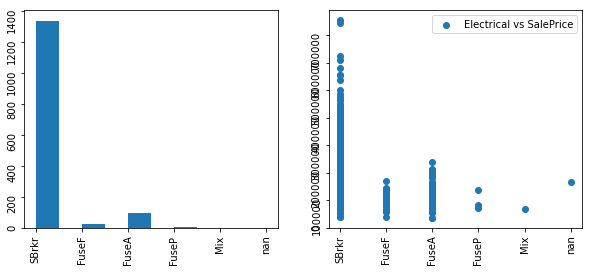

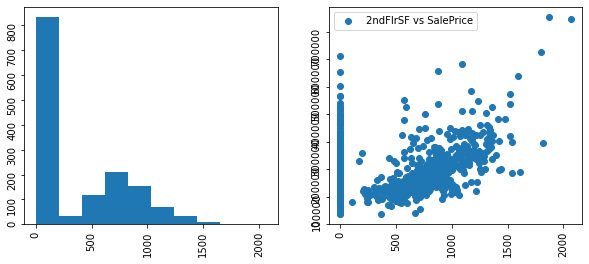

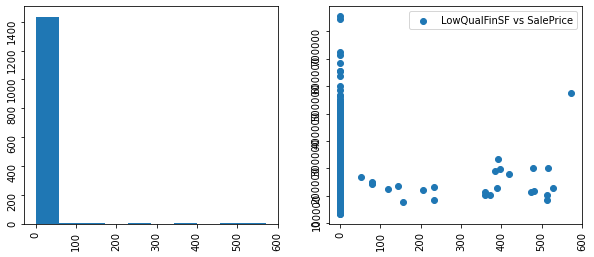

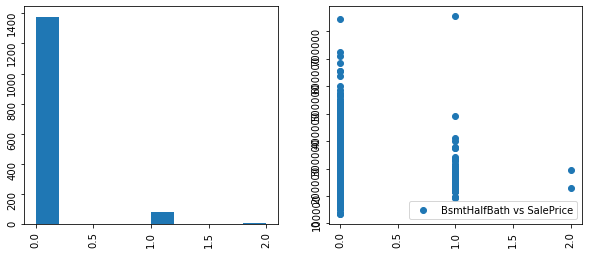

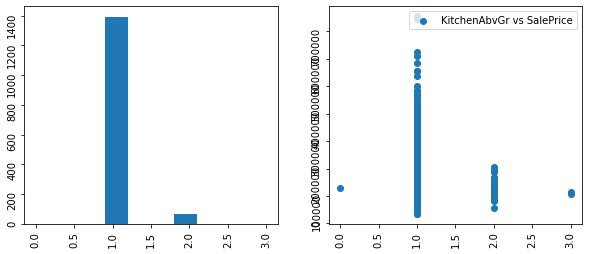

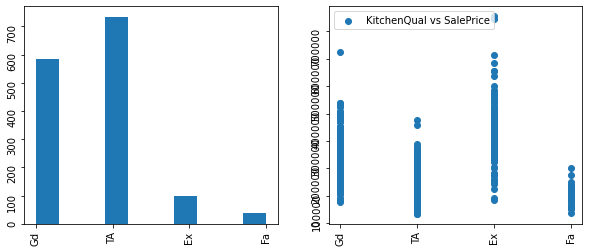

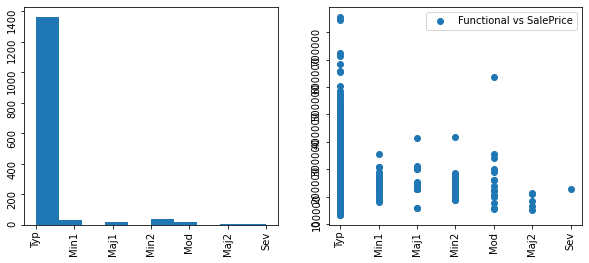

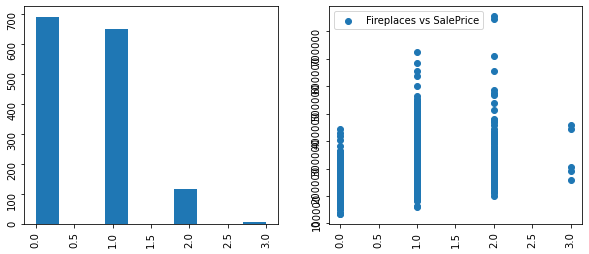

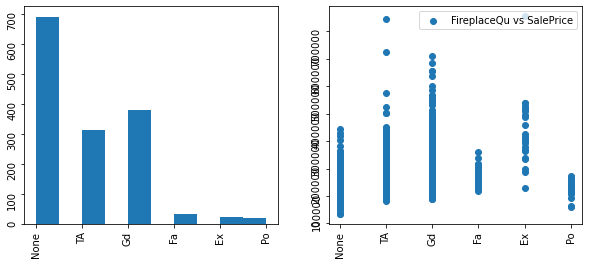

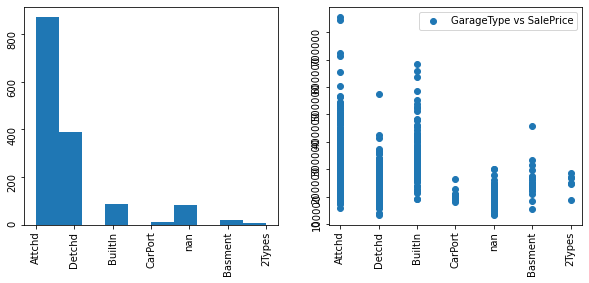

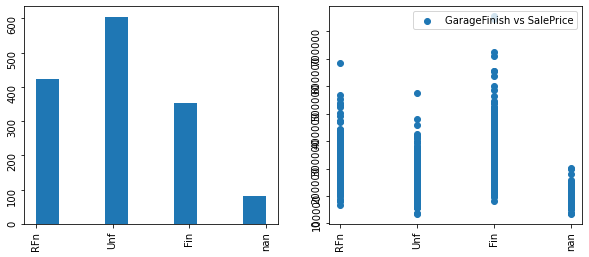

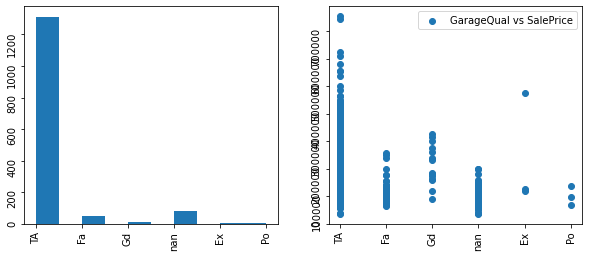

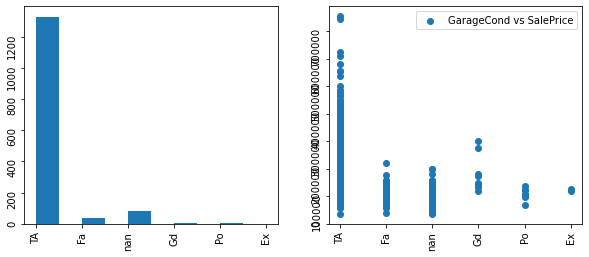

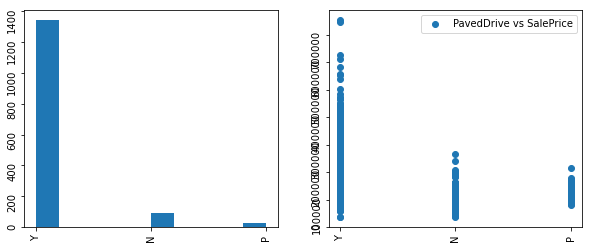

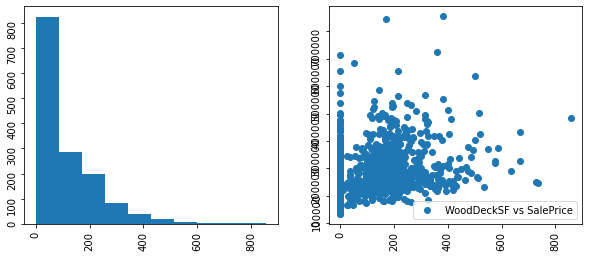

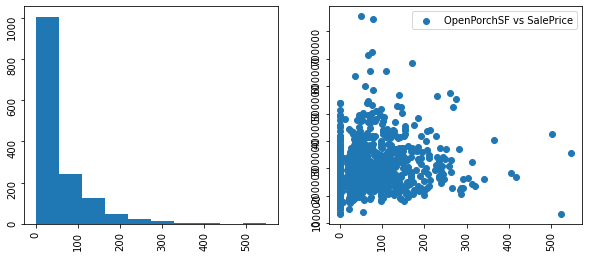

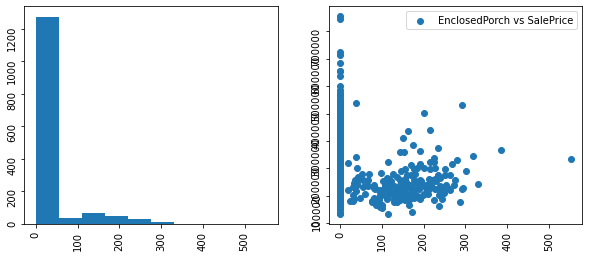

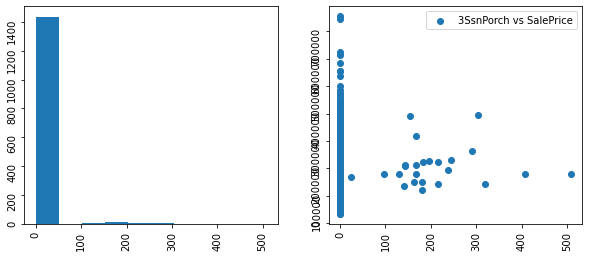

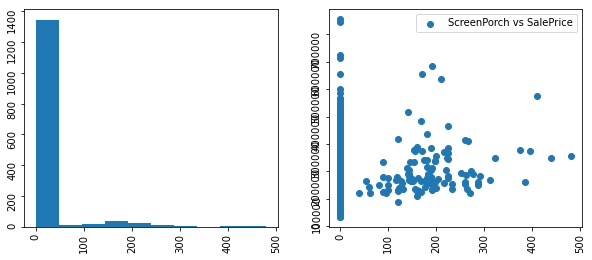

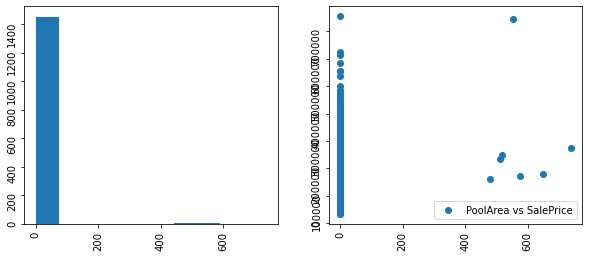

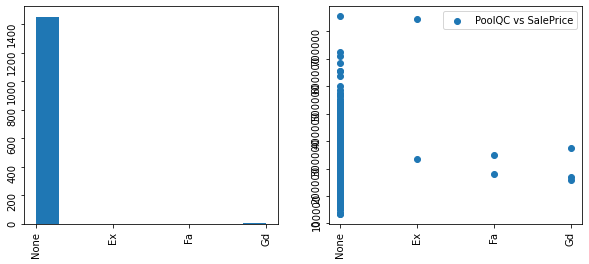

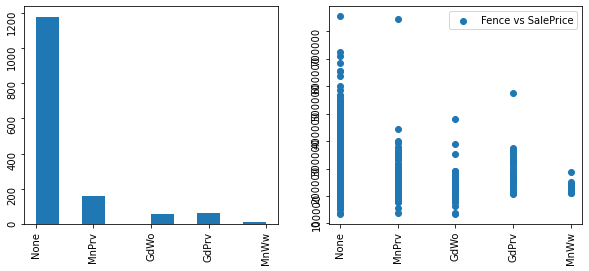

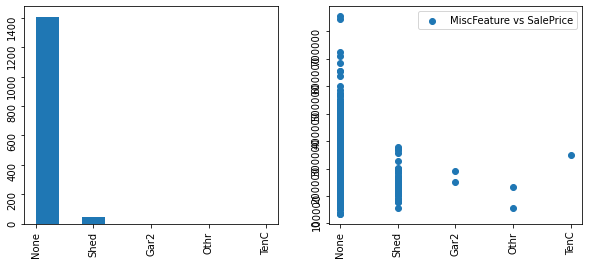

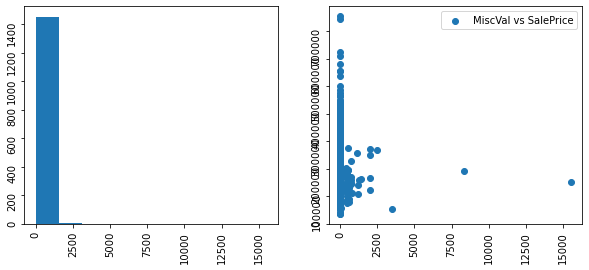

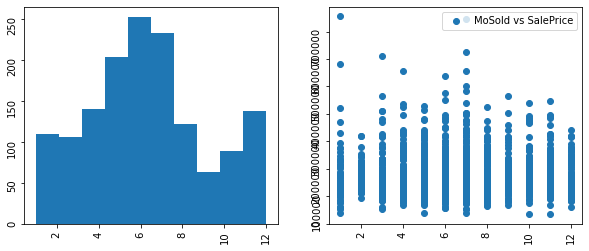

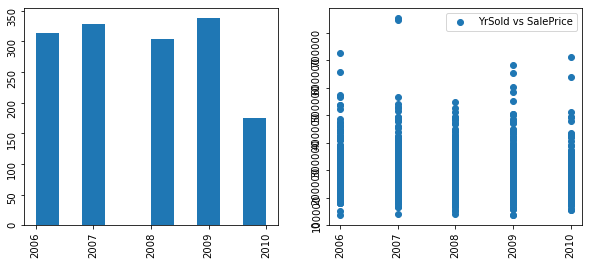

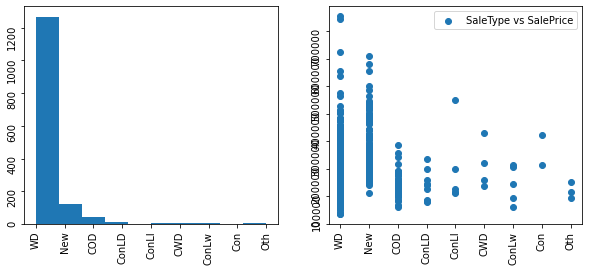

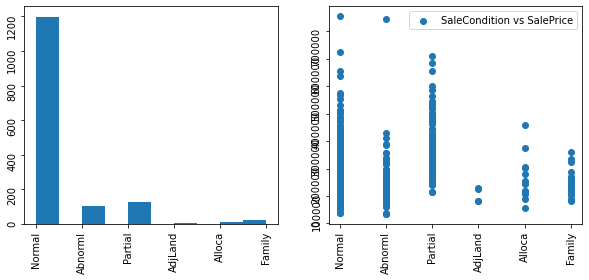

In [10]:
display(n_df.describe(include='all'))

for i in range(len(n_df.columns)-1):
    fig,ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].hist(n_df[n_df.columns[i]],label=n_df.columns[i])
    ax[0].tick_params(labelrotation=90)
    ax[1].scatter(n_df.iloc[:,i],df.iloc[:,-1],label=f"{n_df.columns[i]} vs {n_df.columns[-1]}")
    ax[1].tick_params(labelrotation=90)
    plt.legend()
    plt.show()

There are some feature that are almost constant across the dataset, so we will add to the to_drop list the columns: "Utilities", 'Street' .

In [11]:
to_drop.append("Utilities")
to_drop.append("Street")
n_df.drop(["Utilities",'Street'],axis=1,inplace=True)

## Dataset build
In the next cell we define and apply some regularisation function in order to prepare the dataset for the ML models. We can already see that we have many feature that are categorical, so we will convert these using one hot encoding. 

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score

def std_scaled(df):
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    numeric_cols = numeric_cols[:-1]
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df

def one_hot_encoding(df):
    categorical_cols = list(df.columns[[i for i in range(len(list(df.dtypes))) if str(list(df.dtypes)[i]) == 'object']])
    new_cols = []
    for c in categorical_cols:
        vals = df[c].unique()
        #print(vals)
        for i in vals:
            col_name = f"{c}_{i}"
            df[col_name] =[1 if j==i else 0 for j in df[c]]
            new_cols.append(col_name)
        df.drop(c,axis=1,inplace=True)
    return df,new_cols

def eval_model(model,x_t,y_t,verbose=True):
    y_pred = model.predict(x_t)
    er = pd.DataFrame()
    er['tgt'] = np.log(y_t)
    er['prd'] = np.log(y_pred)
    er['se'] = (er['tgt']-er['prd'])**2
    if verbose== True: print("root mean squared error: ",np.sqrt(er['se'].mean()))
    return np.sqrt(er['se'].mean())

def metric_score(model,x_t,y_t):
    y_pred = model.predict(x_t)
    try:
        rmse = np.sqrt(np.mean((np.log(y_pred[:,0])-np.log(y_t.to_numpy()))**2))
        mae = np.mean(np.abs(np.log(y_pred[:,0])-np.log(y_t.to_numpy())))
        r2 = r2_score(y_t, y_pred)
    except:
        rmse = np.sqrt(np.mean((np.log(y_pred)-np.log(y_t.to_numpy()))**2))
        mae = np.mean(np.abs(np.log(y_pred)-np.log(y_t.to_numpy())))
        r2 = r2_score(y_t, y_pred)
        
    print("R2: ", r2,"\n mae: ",mae,"\n rmse: ",rmse)


In [13]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tempfile import mkdtemp


df = pd.read_csv("train.csv")
q = len(df)
tst = pd.read_csv("test.csv")
df = pd.concat([df,tst]) #we merged the two dataframe in order to obtain an effective preprocessing
df.drop(to_drop,axis=1,inplace=True)


df = std_scaled(df) 
for i in to_fill:
    df[i] = df[i].fillna("None")
df = fill_absent(df)
df = one_hot_encoding(df)[0]

n_df = df.iloc[0:q,1:].dropna(axis=0)
X_df = df.iloc[q:,:].drop("SalePrice",axis=1).dropna(axis=0)

sub_id = X_df['Id']; X_df.drop('Id',axis=1,inplace=True) #needed for saving the forecast for test.csv

n_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_nan,Alley_None,Alley_Grvl,Alley_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_Low,LandContour_HLS,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,HouseStyle_2Story,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_2.5Fin,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Flat,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior1st_nan,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,MasVnrType_nan,ExterQual_Gd,ExterQual_TA,ExterQual_Ex,ExterQual_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Fa,ExterCond_Po,ExterCond_Ex,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Ex,BsmtQual_nan,BsmtQual_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_nan,BsmtCond_Fa,BsmtCond_Po,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_nan,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_nan,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_nan,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,CentralAir_Y,CentralAir_N,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,Electrical_nan,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_nan,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,Functional_nan,FireplaceQu_None,FireplaceQu_TA,FireplaceQu_Gd,FireplaceQu_Fa,FireplaceQu_Ex,FireplaceQu_Po,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_nan,GarageType_Basment,GarageType_2Types,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_nan,GarageQual_T

## Supervised regression models

In [14]:
from sklearn.metrics import mean_squared_error

pipe = [("Decomposition",PCA(50)),("Regression",LinearRegression())]
Y = n_df["SalePrice"]
X = n_df.drop("SalePrice",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42,train_size=.75)

cachedir = mkdtemp() #used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical
reg = Pipeline(pipe,memory=cachedir)

model = reg.fit(X_train,y_train)

metric_score(model,X_test,y_test)


R2:  0.8373285097035176 
 mae:  0.12709813895378033 
 rmse:  0.17082508814285186


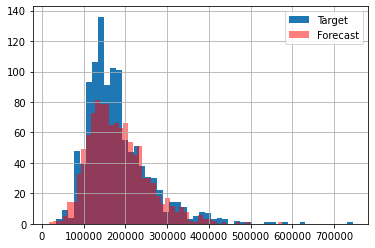

In [15]:
y_pred = model.predict(X_train)
y_train.hist(bins=50,label="Target")
plt.hist(y_pred,bins=50,label="Forecast",color='r',alpha=.5)
plt.legend()
plt.show()

Now we can try different pipeline to verify the best model availabe.

In [16]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import lightgbm as lgb
import warnings

warnings.simplefilter("ignore")
def pipe_maker(n_pca,model):
    #print(f"Hyperparameter: number of feaure {n_pca}; model type {str(model)}")
    elm = [("Decomposition",PCA(n_pca)),("regressor",model)]
    pipe = Pipeline(elm)
    model = pipe.fit(X_train,y_train)
    score = eval_model(model, X_test,y_test,False)
    return score


pca = list(range(50,250,25))
modls = [LinearRegression(), Ridge(alpha=0.5), Ridge(alpha=1), Ridge(alpha=1.5), Ridge(alpha=5), Lasso(alpha=0.5), Lasso(alpha=1), Lasso(alpha=1.5), Lasso(alpha=5), ElasticNet(alpha=0.5, l1_ratio=0.2), ElasticNet(alpha=0.5), ElasticNet(alpha=0.5, l1_ratio=0.8), ElasticNet(l1_ratio=0.2), ElasticNet(), ElasticNet(l1_ratio=0.8), ElasticNet(alpha=1.5, l1_ratio=0.2), ElasticNet(alpha=1.5), ElasticNet(alpha=1.5, l1_ratio=0.8), RandomForestRegressor(), RandomForestRegressor(n_estimators=250), GradientBoostingRegressor(), GradientBoostingRegressor(n_estimators=200), GradientBoostingRegressor(n_estimators=300),GradientBoostingRegressor(n_estimators=450), GradientBoostingRegressor(learning_rate=0.25), GradientBoostingRegressor(learning_rate=0.25, n_estimators=200), GradientBoostingRegressor(learning_rate=0.25, n_estimators=300), GradientBoostingRegressor(learning_rate=0.01), GradientBoostingRegressor(learning_rate=0.01, n_estimators=200), GradientBoostingRegressor(learning_rate=0.01, n_estimators=300),lgb.LGBMRegressor(n_estimators=220)]

scores = np.ndarray((len(pca),len(modls)))
                    
for i in range(len(pca)):
    for j in range(len(modls)):
        scores[i,j] = pipe_maker(pca[i],modls[j])


In [17]:
scrs = pd.DataFrame(scores,columns= [str(i) for i in modls],index=pca)

display(scrs.style.applymap(lambda v: 'background-color: green' if v == scrs.min().min() else ('background-color: orange' if v < 0.16 else '')))


,LinearRegression(),Ridge(alpha=0.5),Ridge(alpha=1),Ridge(alpha=1.5),Ridge(alpha=5),Lasso(alpha=0.5),Lasso(alpha=1),Lasso(alpha=1.5),Lasso(alpha=5),"ElasticNet(alpha=0.5, l1_ratio=0.2)",ElasticNet(alpha=0.5),"ElasticNet(alpha=0.5, l1_ratio=0.8)",ElasticNet(l1_ratio=0.2),ElasticNet(),ElasticNet(l1_ratio=0.8),"ElasticNet(alpha=1.5, l1_ratio=0.2)",ElasticNet(alpha=1.5),"ElasticNet(alpha=1.5, l1_ratio=0.8)",RandomForestRegressor(),RandomForestRegressor(n_estimators=250),GradientBoostingRegressor(),GradientBoostingRegressor(n_estimators=200),GradientBoostingRegressor(n_estimators=300),GradientBoostingRegressor(n_estimators=450),GradientBoostingRegressor(learning_rate=0.25),"GradientBoostingRegressor(learning_rate=0.25, n_estimators=200)","GradientBoostingRegressor(learning_rate=0.25, n_estimators=300)",GradientBoostingRegressor(learning_rate=0.01),"GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)","GradientBoostingRegressor(learning_rate=0.01, n_estimators=300)",LGBMRegressor(n_estimators=220)
50,0.170424,0.168808,0.171373,0.170066,0.171596,0.171316,0.171249,0.172503,0.170025,0.168966,0.164697,0.163044,0.183705,0.172623,0.163640,0.199033,0.181928,0.165759,0.163720,0.161416,0.163331,0.157407,0.160477,0.157426,0.161590,0.164706,0.166246,0.255991,0.206838,0.189765,0.161417
75,0.176877,0.174008,0.172682,0.171083,0.170923,0.173791,0.172032,0.176069,0.173736,0.166268,0.161356,0.159533,0.182399,0.170258,0.160179,0.198084,0.180334,0.162818,0.160859,0.162747,0.163372,0.156975,0.154696,0.156445,0.162446,0.162370,0.162454,0.256006,0.206560,0.190040,0.154740
100,0.177984,0.176260,0.175130,0.177012,0.175042,0.172197,0.176470,0.174297,0.173779,0.166032,0.160886,0.158220,0.182325,0.170121,0.159191,0.198067,0.180359,0.162195,0.165773,0.164705,0.163076,0.162171,0.160532,0.157579,0.163234,0.166203,0.160096,0.255823,0.207290,0.190388,0.162887
125,0.186685,0.192157,0.189686,0.189288,0.179161,0.189432,0.190435,0.189458,0.189607,0.165938,0.160552,0.157868,0.182240,0.169878,0.159244,0.197977,0.180156,0.161928,0.165935,0.165821,0.164192,0.156515,0.157960,0.160400,0.166362,0.161177,0.166307,0.256469,0.207828,0.190601,0.162699
150,0.194482,0.195560,0.190096,0.193108,0.184946,0.191913,0.196350,0.192249,0.195895,0.166021,0.160628,0.158489,0.182249,0.169957,0.159274,0.197996,0.180241,0.162295,0.167813,0.165977,0.163322,0.157425,0.158989,0.154827,0.164287,0.156836,0.166706,0.255435,0.207047,0.189956,0.163511
175,0.194281,0.191238,0.187402,0.187098,0.179928,0.194612,0.194444,0.193083,0.192316,0.165856,0.160432,0.157789,0.182200,0.169867,0.158955,0.197968,0.180159,0.162086,0.169178,0.169665,0.165107,0.158761,0.159421,0.156422,0.169870,0.169821,0.163124,0.257513,0.208614,0.191045,0.164858
200,0.227181,0.203137,0.198245,0.192822,0.179320,0.236960,0.228324,0.225644,0.231341,0.165791,0.160284,0.157512,0.182161,0.169824,0.158820,0.197947,0.180124,0.162028,0.171031,0.170237,0.163427,0.160386,0.160654,0.160323,0.169434,0.174327,0.166161,0.257455,0.208620,0.190102,0.176411
225,0.190048,0.199817,0.183308,0.178404,0.172333,0.189515,0.189007,0.188523,0.185645,0.165780,0.160268,0.157421,0.182155,0.169812,0.158785,0.197943,0.180113,0.162000,0.170982,0.171165,0.169936,0.164370,0.164014,0.163005,0.174786,0.176472,0.175305,0.256472,0.208318,0.189753,0.173412


The Gradient boosting regressor with 300 estimators and 75 feature (after PCA) results to be the best model with a root mean squared error of 0.1393.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42,train_size=.75)

model_best = Pipeline([("decomp",PCA(75)),("regr",GradientBoostingRegressor(n_estimators=300))])
model_best.fit(X_train,y_train)

metric_score(model_best,X_test,y_test)

R2:  0.8401604037567776 
 mae:  0.11145156623934481 
 rmse:  0.15639202508211303


In [19]:
'''import datetime as dt #script to save the results for kaggle submission.
#regression
my_sub = pd.DataFrame()
my_sub['Id'] = sub_id
my_sub['SalePrice'] = model_best.predict(X_df)
sub = pd.read_csv("sample_submission.csv")
sub.drop("SalePrice",axis=1,inplace=True)
sub['SalePrice'] =my_sub['SalePrice']
sub = sub.set_index('Id')
sub['SalePrice'].fillna(sub['SalePrice'].mean(), inplace=True)
sub.to_csv(f"my_submission_GBR_{str(dt.datetime.now())}.csv")
'''

'import datetime as dt #script to save the results for kaggle submission.\n#regression\nmy_sub = pd.DataFrame()\nmy_sub[\'Id\'] = sub_id\nmy_sub[\'SalePrice\'] = model_best.predict(X_df)\nsub = pd.read_csv("sample_submission.csv")\nsub.drop("SalePrice",axis=1,inplace=True)\nsub[\'SalePrice\'] =my_sub[\'SalePrice\']\nsub = sub.set_index(\'Id\')\nsub[\'SalePrice\'].fillna(sub[\'SalePrice\'].mean(), inplace=True)\nsub.to_csv(f"my_submission_GBR_{str(dt.datetime.now())}.csv")\n'

## Neural network approach
The data has already been manipulated so we can build a neural network to forecast the price. In doing so we will mix the sklearn library and the keras module to produce a pipeline which will be able to do PCA and then train the neural network.

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import tensorflow as tf


Using TensorFlow backend.


In [21]:
def root_mean_squared_error(y_true, y_pred):
    log_diff = tf.math.log(y_pred + 1) - tf.math.log(y_true + 1)
    return tf.math.sqrt(tf.math.reduce_mean(tf.math.square(log_diff)))
    
def builder(name,inputShape = (1,)):
    model = Sequential(name=name)
    model.add(Dense(200,activation='relu',input_shape=inputShape,name='input'))
    model.add(Dense(200,activation='relu',name='layer_1'))
    model.add(Dense(150,activation='relu',name='layer_2'))
    model.add(Dense(150,activation='relu',name='layer_3'))
    model.add(Dense(100,activation='relu',name='layer_4'))
    model.add(Dense(1,name='output'))
    
    print("model.output_shape: %s" %(str(model.output_shape)))
    print("Model.summary"); model.summary()
    print("Model.config"); model.get_config()
    


    model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=['mse',root_mean_squared_error])

    return model

kNN = Pipeline([("Decomp",PCA(100)),("Network",builder("Housing Price",(100,)))])

model.output_shape: (None, 1)
Model.summary
Model: "Housing Price"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 200)               20200     
_________________________________________________________________
layer_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
layer_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
layer_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
layer_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 128,401
Trainable params: 128,401
Non-trainable params: 0
___

In [22]:
Y = n_df["SalePrice"]
X = n_df.drop("SalePrice",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42,train_size=.75)

history = kNN.fit(X_train,y_train,Network__validation_split=1/4, Network__epochs=100, Network__verbose=1)


Train on 821 samples, validate on 274 samples
Epoch 1/100
821/821 [==============================] - 1s 1ms/step - loss: 9.4748 - mse: 39533375488.0000 - root_mean_squared_error: 9.4426 - val_loss: 6.9943 - val_mse: 37671227392.0000 - val_root_mean_squared_error: 6.9932
Epoch 2/100
821/821 [==============================] - 0s 285us/step - loss: 5.5471 - mse: 39215067136.0000 - root_mean_squared_error: 5.5314 - val_loss: 4.2977 - val_mse: 36855635968.0000 - val_root_mean_squared_error: 4.2967
Epoch 3/100
821/821 [==============================] - 0s 287us/step - loss: 3.4548 - mse: 37313212416.0000 - root_mean_squared_error: 3.4453 - val_loss: 2.7098 - val_mse: 33543612416.0000 - val_root_mean_squared_error: 2.7092
Epoch 4/100
821/821 [==============================] - 0s 288us/step - loss: 2.1030 - mse: 31682074624.0000 - root_mean_squared_error: 2.0969 - val_loss: 1.5848 - val_mse: 25576843264.0000 - val_root_mean_squared_error: 1.5847
Epoch 5/100
821/821 [===========================

821/821 [==============================] - 0s 288us/step - loss: 0.0583 - mse: 604556608.0000 - root_mean_squared_error: 0.0577 - val_loss: 0.1447 - val_mse: 674721856.0000 - val_root_mean_squared_error: 0.1447
Epoch 38/100
821/821 [==============================] - 0s 272us/step - loss: 0.0550 - mse: 581595648.0000 - root_mean_squared_error: 0.0547 - val_loss: 0.1438 - val_mse: 669379584.0000 - val_root_mean_squared_error: 0.1440
Epoch 39/100
821/821 [==============================] - 0s 276us/step - loss: 0.0592 - mse: 579979584.0000 - root_mean_squared_error: 0.0589 - val_loss: 0.1416 - val_mse: 658812608.0000 - val_root_mean_squared_error: 0.1415
Epoch 40/100
821/821 [==============================] - 0s 278us/step - loss: 0.0574 - mse: 554129920.0000 - root_mean_squared_error: 0.0576 - val_loss: 0.1441 - val_mse: 672407808.0000 - val_root_mean_squared_error: 0.1441
Epoch 41/100
821/821 [==============================] - 0s 277us/step - loss: 0.0567 - mse: 557382592.0000 - root_mea

Epoch 74/100
821/821 [==============================] - 0s 276us/step - loss: 0.0383 - mse: 263874720.0000 - root_mean_squared_error: 0.0381 - val_loss: 0.1441 - val_mse: 663440832.0000 - val_root_mean_squared_error: 0.1441
Epoch 75/100
821/821 [==============================] - 0s 276us/step - loss: 0.0385 - mse: 248957392.0000 - root_mean_squared_error: 0.0382 - val_loss: 0.1451 - val_mse: 687794496.0000 - val_root_mean_squared_error: 0.1452
Epoch 76/100
821/821 [==============================] - 0s 277us/step - loss: 0.0361 - mse: 228070912.0000 - root_mean_squared_error: 0.0359 - val_loss: 0.1454 - val_mse: 697983936.0000 - val_root_mean_squared_error: 0.1452
Epoch 77/100
821/821 [==============================] - 0s 280us/step - loss: 0.0355 - mse: 237633104.0000 - root_mean_squared_error: 0.0357 - val_loss: 0.1436 - val_mse: 669444096.0000 - val_root_mean_squared_error: 0.1438
Epoch 78/100
821/821 [==============================] - 0s 280us/step - loss: 0.0366 - mse: 237019728.00

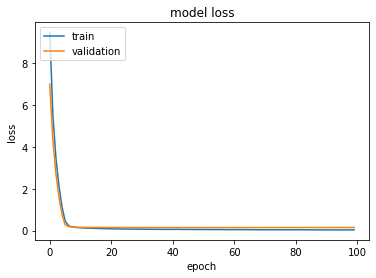

In [23]:
#print(print(history[1].history.history.keys())) #if you change the metrics you can check here the name of the dict keys for plotting

plt.plot(history[1].history.history['loss'])
plt.plot(history[1].history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

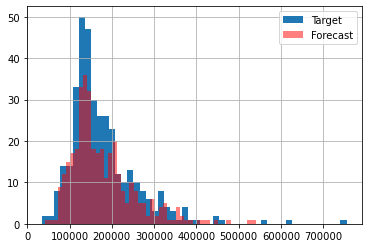

In [24]:
y_pred = history.predict(X_test)


y_test.hist(bins=50,label="Target")
plt.hist(y_pred,bins=50,label="Forecast",color='r',alpha=.5)
plt.legend()
plt.show()

In [25]:
metric_score(history,X_test,y_test)

R2:  0.8027967135997367 
 mae:  0.12470840827691902 
 rmse:  0.18047152455762835


The artificial neural network fit well the test data. The histogram above shows the target price in blu and the forecast offered by the model in red.

In [26]:
Y = n_df["SalePrice"]
X = n_df.drop("SalePrice",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42,train_size=.75)

def NN_buil(neurons = [200,200,200,200],act_fun='relu',optm='adam',inputShape = (1,)):
    name = f"{len(neurons)}_{neurons}"
    model = Sequential(name=name)
    model.add(Dense(neurons[0],activation=act_fun,input_shape=inputShape,name='input'))
    for n in neurons[1:]:
        model.add(Dense(n,activation=act_fun)) 
    
    model.add(Dense(1,name='output'))
    
    '''print("model.output_shape: %s" %(str(model.output_shape)))
    print("Model.summary"); model.summary()
    print("Model.config"); model.get_config()'''
    def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

    model.compile(loss=root_mean_squared_error, optimizer=optm, metrics=[root_mean_squared_error])

    return model


def pipe_maker_nn(n_pca,model):
    #print(f"Hyperparameter: number of feaure {n_pca}; model type {str(model)}")
    elm = [("Decomposition",PCA(n_pca)),("Network",model)]
    pipe = Pipeline(elm)
    model = pipe.fit(X_train,y_train,Network__validation_split=1/4, Network__epochs=200, Network__verbose=0)
    y_pred = model.predict(X_test)
    er = pd.DataFrame()
    er['tgt'] = np.log(y_test)
    er['prd'] = np.log(y_pred)
    er['se'] = (er['tgt']-er['prd'])**2
    return np.sqrt(er['se'].mean())
    

pca = list(range(50,250,25))

modls = [[200,200,200,200,200],[200,200,150,150,100],[300,200,150,150,100],[400,300,200,100],[500,400,300,200,100],[500,500,500,500,500]]

scores_nn = np.ndarray((len(pca),len(modls)))
                 
    
for i in range(len(pca)):
    for j in range(len(modls)):
        
        scores_nn[i,j] = pipe_maker_nn(pca[i],NN_buil(neurons=modls[j],inputShape=(pca[i],)))


In [27]:
scrs_nn = pd.DataFrame(scores_nn,columns= [str(i) for i in modls],index=pca)
display(scrs_nn.style.applymap(lambda v: 'background-color: green' if v == scrs_nn.min().min() else ('background-color: orange' if v < 0.185 else '')))


,"[200, 200, 200, 200, 200]","[200, 200, 150, 150, 100]","[300, 200, 150, 150, 100]","[400, 300, 200, 100]","[500, 400, 300, 200, 100]","[500, 500, 500, 500, 500]"
50,0.197827,0.207596,0.212746,0.210621,0.206187,0.199100
75,0.212873,0.209751,0.198770,0.200226,0.199677,0.196935
100,0.197328,0.204367,0.201184,0.198456,0.199090,0.198127
125,0.201225,0.194050,0.193530,0.193093,0.189666,0.187527
150,0.190873,0.191096,0.193266,0.189513,0.191623,0.193142
175,0.195589,0.186594,0.188448,0.186962,0.187298,0.189753
200,0.193478,0.183631,0.189730,0.182950,0.187065,0.180255
225,0.179596,0.183544,0.178876,0.179191,0.175576,0.181243


For the neural network model, the best results is obtained with a 5 layer network having same number of neurons. 

In [29]:
model_best_nn = Pipeline([("Decomposition",PCA(225)),("Network",NN_buil(neurons=[500, 400, 300, 200, 100],inputShape=(225,)))])
model_best_nn.fit(X_train,y_train,Network__validation_split=1/4, Network__epochs=200, Network__verbose=0)
metric_score(model_best_nn,X_test,y_test)

R2:  0.8176895662988681 
 mae:  0.1272686615125422 
 rmse:  0.1786913249037039


In [ ]:
'''import datetime as dt #script to save the results for kaggle submission.
#regression
my_sub = pd.DataFrame()
my_sub['Id'] = sub_id
my_sub['SalePrice'] = model_best_nn.predict(X_df)
sub = pd.read_csv("sample_submission.csv")
sub.drop("SalePrice",axis=1,inplace=True)
sub['SalePrice'] =my_sub['SalePrice']
sub = sub.set_index('Id')
sub['SalePrice'].fillna(sub['SalePrice'].mean(), inplace=True)
sub.to_csv(f"my_submission_NN_{str(dt.datetime.now())}.csv")
'''

Overall the best results in the kaggle competition is obtained using the GBR model, still the NN produce a good results with a simila mean absolute error and explained variance. The root mean square error is 11% smaller for the gradient boosting regressor, wiht a RMSE of 0.15 compared to 0.17

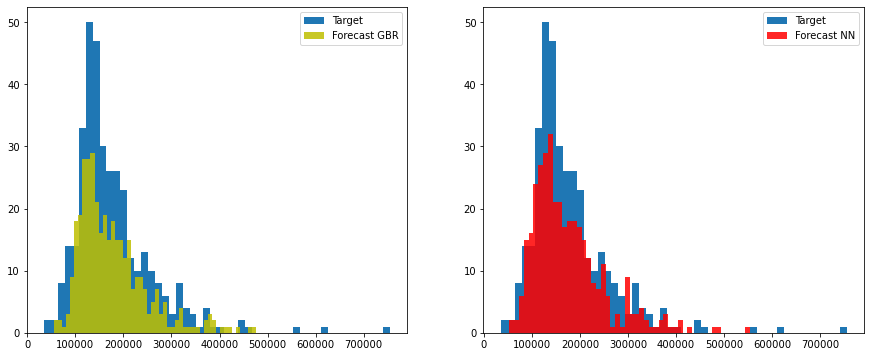

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,6))


ax[0].hist(y_test,bins=50,label='Target')
ax[1].hist(y_test,bins=50,label='Target')
ax[0].hist(model_best.predict(X_test),bins=50,label="Forecast GBR",color='y',alpha=.85)
ax[1].hist(model_best_nn.predict(X_test),bins=50,label="Forecast NN",color='r',alpha=.85)
ax[0].legend()
ax[1].legend()
plt.show()

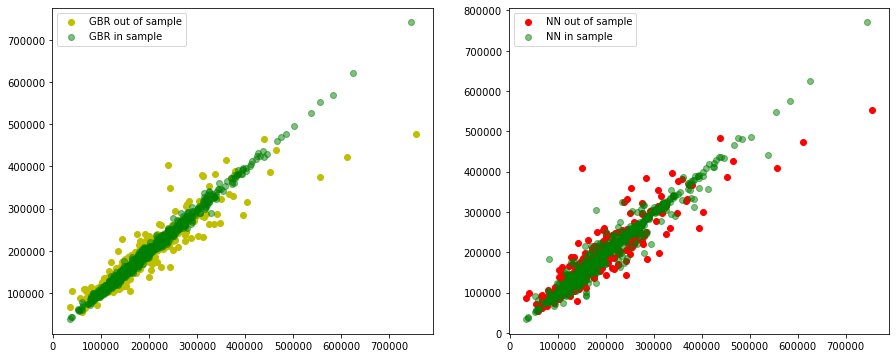

GBR out sample score
R2:  0.8401604037567776 
 mae:  0.11145156623934481 
 rmse:  0.15639202508211303
GBR in sample score
R2:  0.991677580708616 
 mae:  0.033031853590795954 
 rmse:  0.04395095271114787

NN out sample score
R2:  0.8176895662988681 
 mae:  0.1272686615125422 
 rmse:  0.1786913249037039
NN in sample score
R2:  0.9671094504782929 
 mae:  0.03934854815323634 
 rmse:  0.0813631967784877


In [31]:
fig,ax = plt.subplots(1,2,figsize=(15,6))


ax[0].scatter(y_test,model_best.predict(X_test),label="GBR out of sample",color='y')
ax[0].scatter(y_train,model_best.predict(X_train),label="GBR in sample",color='g',alpha=.5)
ax[1].scatter(y_test,model_best_nn.predict(X_test),label="NN out of sample",color='r')
ax[1].scatter(y_train,model_best_nn.predict(X_train),label="NN in sample",color='g',alpha=.5)

ax[0].legend()
ax[1].legend()
plt.show()

print("GBR out sample score")
metric_score(model_best,X_test,y_test)
print("GBR in sample score")
metric_score(model_best,X_train,y_train)
print("\nNN out sample score")
metric_score(model_best_nn,X_test,y_test)
print("NN in sample score")
metric_score(model_best_nn,X_train,y_train)


As we can see the both the models tend to be overfitted. On the other hand a more accurate feature selection and data cleaning could improve the performance of the modles developed.